In [11]:
import keras
from tensorflow.keras.utils import to_categorical
import nltk
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.optimizers import Adam, SGD
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from keras import models
from keras import layers
import matplotlib.pyplot as plt

In [12]:
train = fetch_20newsgroups(subset='train', shuffle=True, random_state=42)
test = fetch_20newsgroups(subset='test', shuffle=True, random_state=42)

In [13]:
class StemmedCountVectorizer(CountVectorizer):
  def build(self):
    analyzer = super(StemmedCountVectorizer, self).build_analyzer()
    return lambda text: ([stemmer.stem(word) for word in analyzer(text)])
  
stemmer = SnowballStemmer('english', ignore_stopwords=True)
stem_count_vec = StemmedCountVectorizer(stop_words='english')

stem_count_vec.fit(train.data)

X_train = stem_count_vec.transform(train.data)
X_test = stem_count_vec.transform(test.data)

num_classes = np.max(train['target']) + 1

y_train = to_categorical(train.target, num_classes)
y_test = to_categorical(test.target, num_classes)

In [14]:
input_dim = X_train.shape[1]
output_dim = y_train.shape[1]

model_1 = keras.Sequential(
  [
    layers.Dense(64, input_dim=input_dim, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(output_dim, activation='softmax'),
  ]
)

model_1.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['acc'])

history = model_1.fit(X_train,
                      y_train,
                      epochs=50,
                      verbose=True,
                      validation_data=(X_test, y_test),
                      batch_size=32)

Epoch 1/50


c:\Users\Gabriel\anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_4/dense_10/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_4/dense_10/embedding_lookup_sparse/Reshape:0", shape=(None, 64), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_4/dense_10/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


354/354 [==============================] - 3s 6ms/step - loss: 2.7331 - acc: 0.3647 - val_loss: 2.2751 - val_acc: 0.6287
Epoch 2/50
354/354 [==============================] - 2s 5ms/step - loss: 1.9166 - acc: 0.6110 - val_loss: 1.8713 - val_acc: 0.7033
Epoch 3/50
354/354 [==============================] - 2s 6ms/step - loss: 1.6504 - acc: 0.6995 - val_loss: 1.6299 - val_acc: 0.7384
Epoch 4/50
354/354 [==============================] - 2s 6ms/step - loss: 1.2921 - acc: 0.7517 - val_loss: 1.4580 - val_acc: 0.7574
Epoch 5/50
354/354 [==============================] - 2s 5ms/step - loss: 1.0948 - acc: 0.7896 - val_loss: 1.3318 - val_acc: 0.7699
Epoch 6/50
354/354 [==============================] - 2s 5ms/step - loss: 0.9755 - acc: 0.8112 - val_loss: 1.2469 - val_acc: 0.7739
Epoch 7/50
354/354 [==============================] - 2s 5ms/step - loss: 1.1760 - acc: 0.8323 - val_loss: 1.1916 - val_acc: 0.7793
Epoch 8/50
354/354 [==============================] - 2s 6ms/step - loss: 0.7938 - acc:

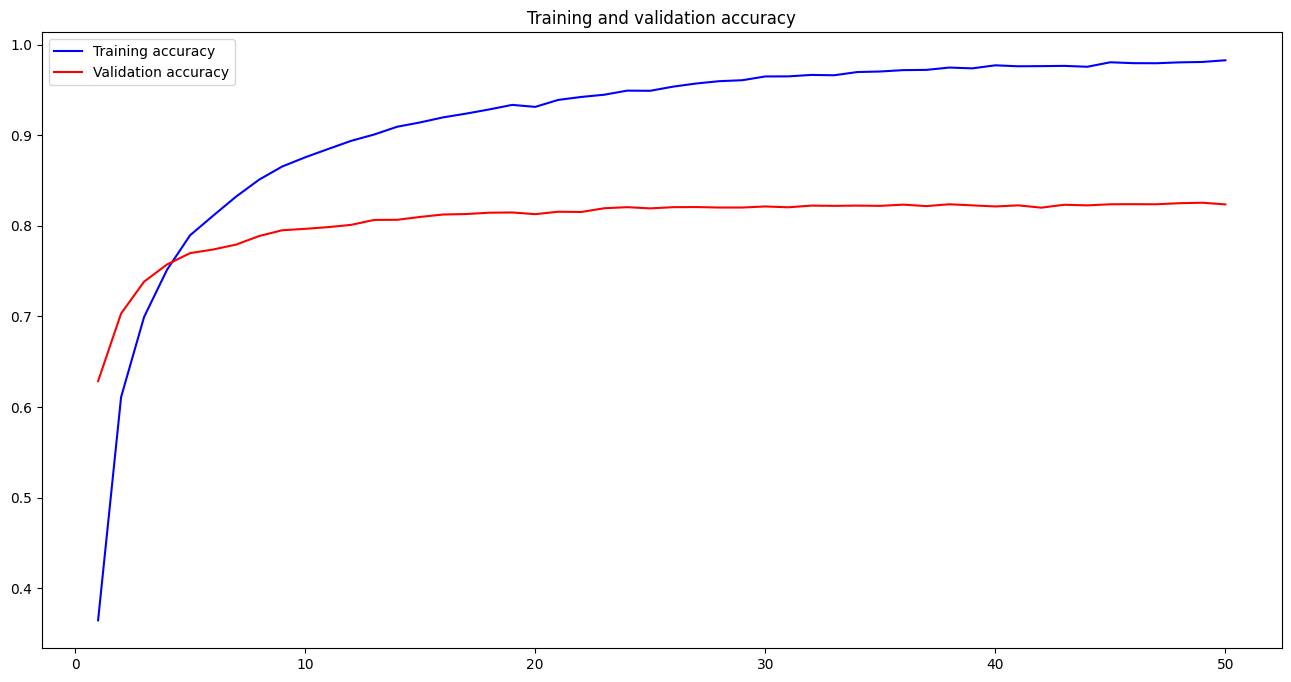

In [15]:
def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']

    x = range(1, len(acc) + 1)

    plt.figure(figsize=(16, 8))
    plt.plot(x, acc, 'blue', label='Training accuracy')
    plt.plot(x, val_acc, 'red', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()

plot_history(history)

Epoch 1/50


c:\Users\Gabriel\anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_5/dense_12/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_5/dense_12/embedding_lookup_sparse/Reshape:0", shape=(None, 128), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_5/dense_12/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


1132/1132 [==============================] - 6s 5ms/step - loss: 2.3196 - acc: 0.5732 - val_loss: 1.5918 - val_acc: 0.7337
Epoch 2/50
1132/1132 [==============================] - 6s 5ms/step - loss: 1.0632 - acc: 0.7875 - val_loss: 1.1559 - val_acc: 0.7708
Epoch 3/50
1132/1132 [==============================] - 6s 5ms/step - loss: 0.7168 - acc: 0.8629 - val_loss: 0.9859 - val_acc: 0.7913
Epoch 4/50
1132/1132 [==============================] - 6s 5ms/step - loss: 0.5144 - acc: 0.9019 - val_loss: 0.9075 - val_acc: 0.8014
Epoch 5/50
1132/1132 [==============================] - 6s 5ms/step - loss: 0.4301 - acc: 0.9253 - val_loss: 0.8609 - val_acc: 0.8082
Epoch 6/50
1132/1132 [==============================] - 6s 5ms/step - loss: 0.3401 - acc: 0.9380 - val_loss: 0.8491 - val_acc: 0.8099
Epoch 7/50
1132/1132 [==============================] - 6s 5ms/step - loss: 0.2793 - acc: 0.9516 - val_loss: 0.8202 - val_acc: 0.8129
Epoch 8/50
1132/1132 [==============================] - 6s 5ms/step - los

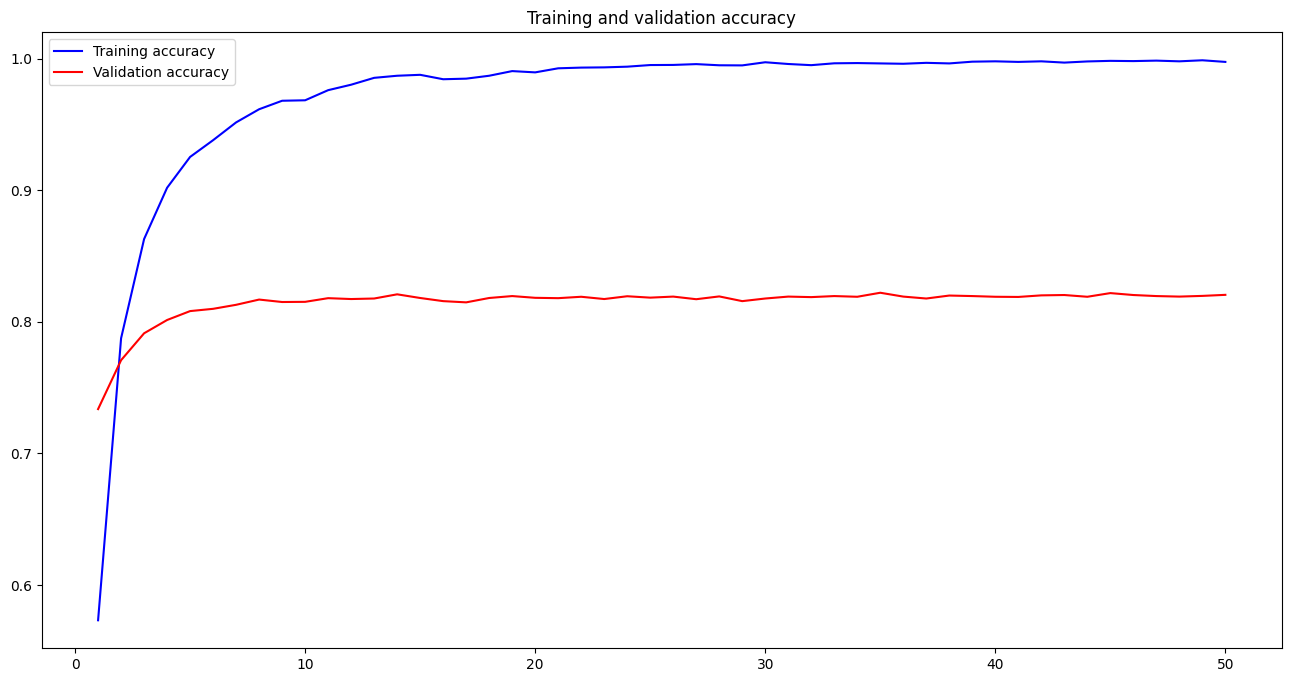

In [16]:
model_2 = keras.Sequential(
  [
    layers.Dense(128, input_dim=input_dim, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(output_dim, activation='softmax'),
  ]
)

model_2.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['acc'])

history = model_2.fit(X_train,
                      y_train,
                      epochs=50,
                      verbose=True,
                      validation_data=(X_test, y_test),
                      batch_size=10)

plot_history(history)

Epoch 1/50


c:\Users\Gabriel\anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_6/dense_14/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_6/dense_14/embedding_lookup_sparse/Reshape:0", shape=(None, 128), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_6/dense_14/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


1132/1132 [==============================] - 7s 6ms/step - loss: 2.7650 - acc: 0.3750 - val_loss: 1.9404 - val_acc: 0.6733
Epoch 2/50
1132/1132 [==============================] - 6s 6ms/step - loss: 2.0598 - acc: 0.6214 - val_loss: 1.6479 - val_acc: 0.7465
Epoch 3/50
1132/1132 [==============================] - 6s 5ms/step - loss: 3.5730 - acc: 0.6882 - val_loss: 2.3971 - val_acc: 0.7245
Epoch 4/50
1132/1132 [==============================] - 6s 5ms/step - loss: 0.9763 - acc: 0.7458 - val_loss: 2.0955 - val_acc: 0.7734
Epoch 5/50
1132/1132 [==============================] - 6s 5ms/step - loss: 7500.1519 - acc: 0.6346 - val_loss: 22515.1270 - val_acc: 0.0526
Epoch 6/50
1132/1132 [==============================] - 6s 5ms/step - loss: 152025.8906 - acc: 0.0528 - val_loss: 2.9961 - val_acc: 0.0526
Epoch 7/50
1132/1132 [==============================] - 6s 6ms/step - loss: 4.1654 - acc: 0.0525 - val_loss: 2.9923 - val_acc: 0.0526
Epoch 8/50
1132/1132 [==============================] - 6s 6m

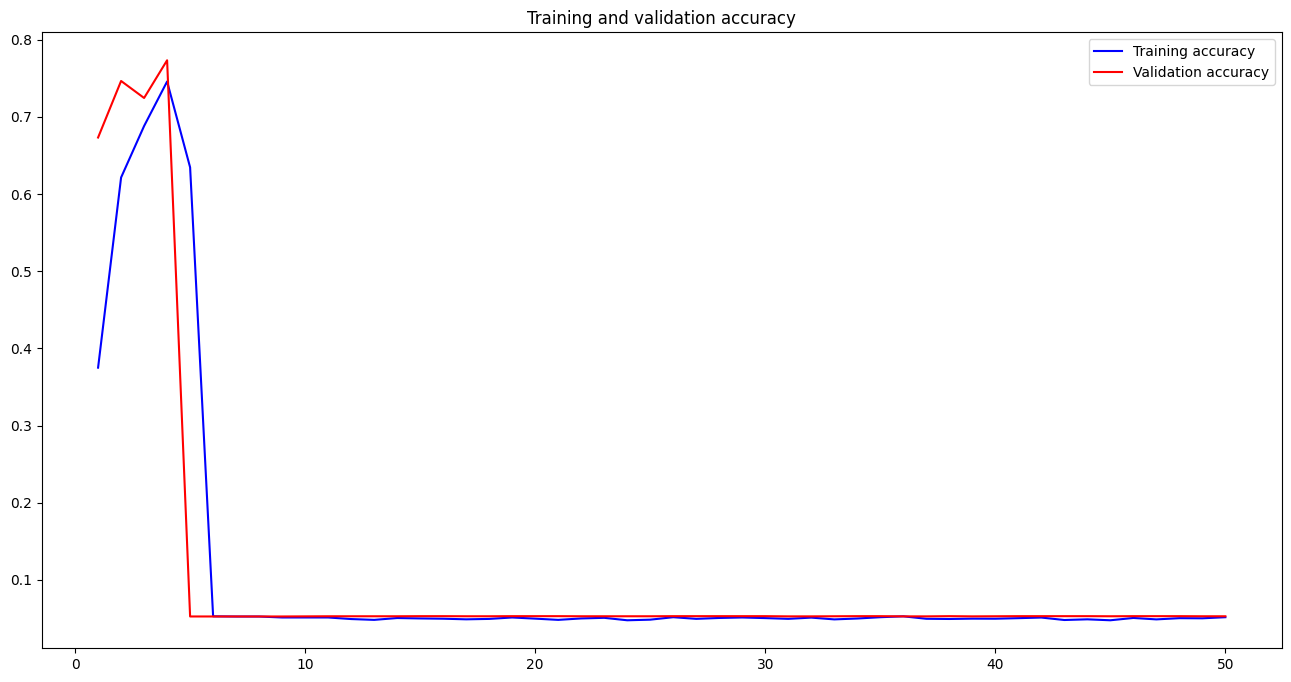

In [17]:
model_3 = keras.Sequential(
  [
    layers.Dense(128, input_dim=input_dim, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(output_dim, activation='softmax'),
  ]
)

model_3.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['acc'])

history = model_3.fit(X_train,
                      y_train,
                      epochs=50,
                      verbose=True,
                      validation_data=(X_test, y_test),
                      batch_size=10)

plot_history(history)

Epoch 1/50


c:\Users\Gabriel\anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_7/dense_17/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_7/dense_17/embedding_lookup_sparse/Reshape:0", shape=(None, 128), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_7/dense_17/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


354/354 [==============================] - 3s 6ms/step - loss: 2.8879 - acc: 0.2753 - val_loss: 2.4577 - val_acc: 0.5100
Epoch 2/50
354/354 [==============================] - 2s 6ms/step - loss: 2.0618 - acc: 0.5232 - val_loss: 1.8977 - val_acc: 0.6913
Epoch 3/50
354/354 [==============================] - 2s 6ms/step - loss: 2.2955 - acc: 0.6098 - val_loss: 1.5718 - val_acc: 0.7266
Epoch 4/50
354/354 [==============================] - 2s 6ms/step - loss: 1.2617 - acc: 0.7173 - val_loss: 1.3498 - val_acc: 0.7480
Epoch 5/50
354/354 [==============================] - 2s 5ms/step - loss: 1.0027 - acc: 0.7743 - val_loss: 1.1727 - val_acc: 0.7756
Epoch 6/50
354/354 [==============================] - 2s 6ms/step - loss: 0.8038 - acc: 0.8236 - val_loss: 1.0754 - val_acc: 0.7827
Epoch 7/50
354/354 [==============================] - 2s 6ms/step - loss: 0.6907 - acc: 0.8514 - val_loss: 1.0185 - val_acc: 0.7950
Epoch 8/50
354/354 [==============================] - 2s 6ms/step - loss: 0.5876 - acc:

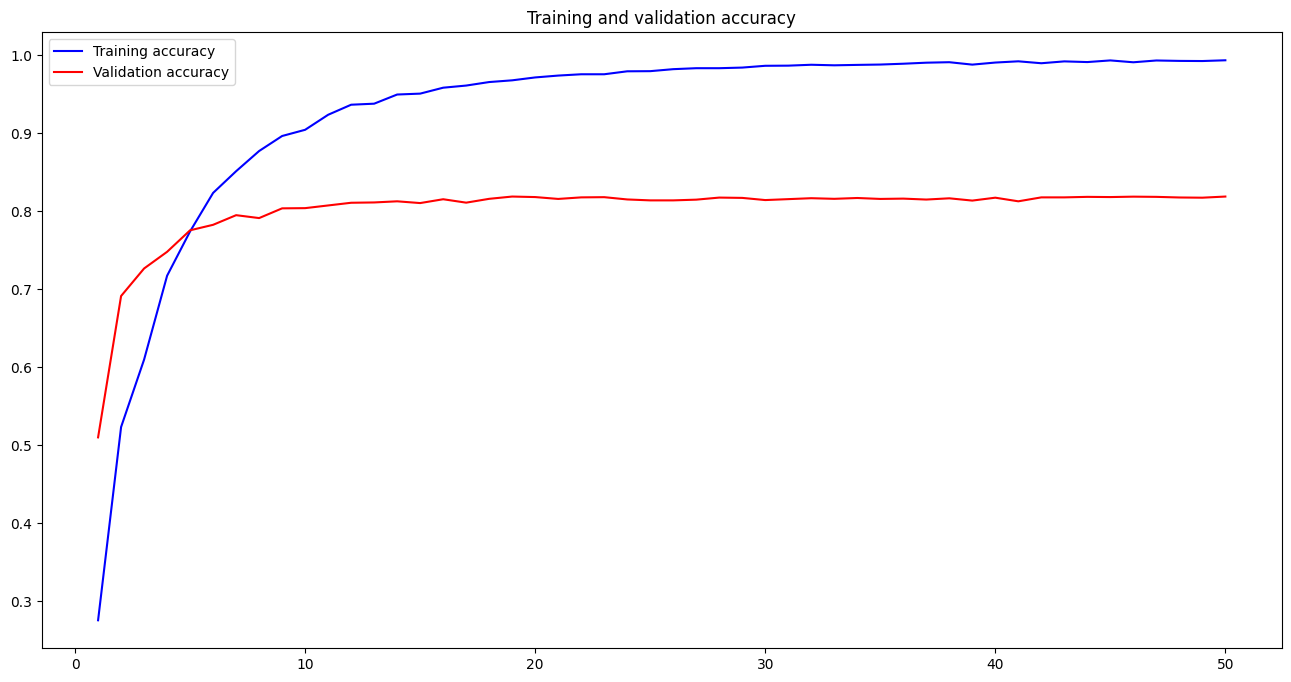

In [18]:
model_4 = keras.Sequential(
  [
    layers.Dense(128, input_dim=input_dim, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(output_dim, activation='softmax'),
  ]
)

model_4.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['acc'])

history = model_4.fit(X_train,
                      y_train,
                      epochs=50,
                      verbose=True,
                      validation_data=(X_test, y_test),
                      batch_size=32)

plot_history(history)